In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/weather.csv')
df.head()

print('total records: {}'.format(len(df)))

total records: 1095


In [16]:
# count null before cleaning
print('rows with null values: {}'.format(len(df) - df.count()))

# remove all rows with any column
df_removed_null = df.copy()
df_removed_null.dropna(inplace=True)  
print('rows with null values after cleaning: {}'.format(len(df_removed_null) - df_removed_null.count()))
print('final total of records: {}'.format(len(df_removed_null)))

df_initial = df.copy()
df = df_removed_null

rows with null values: number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64
rows with null values after cleaning: number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64
final total of records: 1064


In [17]:
# first create a binary categorical variable column
def get_humidity_level(row):
    air_pressure = row['relative_humidity_3pm']
    humidity_label = 'unknown'
    if(air_pressure <= 25):
        humidity_label = 'low humidity'
    elif(air_pressure > 25):
        humidity_label = 'high humidity'
        
    return humidity_label

df['humidity_label'] = df.apply(get_humidity_level, axis=1)
df.head()


,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,humidity_label
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,high humidity
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,low humidity
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,low humidity
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,low humidity
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,high humidity


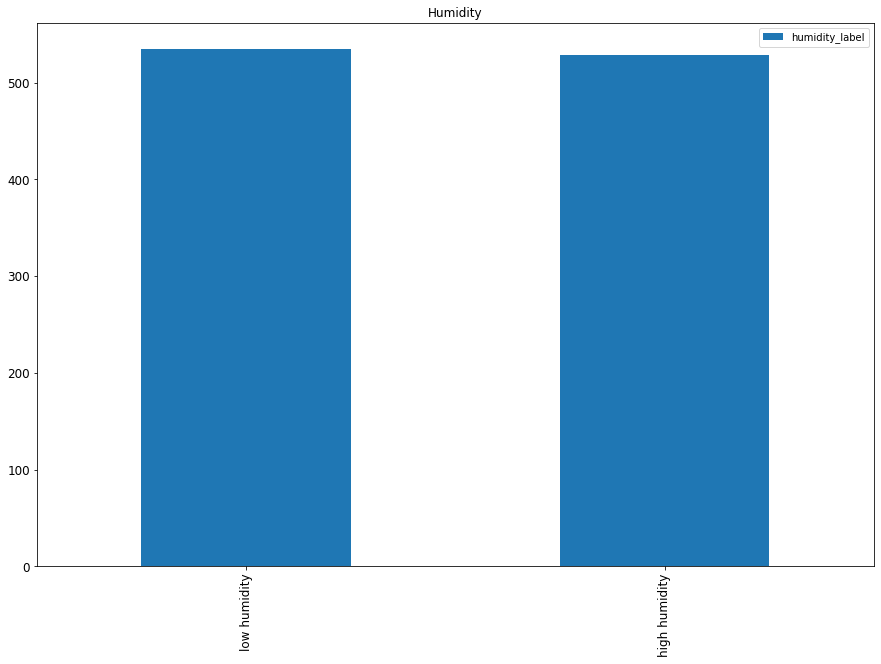

In [19]:
# plot low humityd vs high

import matplotlib.pyplot as plt
ax = df['humidity_label'].value_counts().plot(kind='bar', title ="Humidity", figsize=(15, 10), legend=True, fontsize=12)
plt.show()